In [1]:
import numpy as np
import math
from matplotlib import colors


In [2]:
""" Initial conditions. """
interest_rate = 0.04
volatility = 0.3
S_0 = 100
strike_price = 110

maturity = 1
delta_t = 0.01


delta_x = 1
Vmax = 60#strike_price#N * delta_x-strike_price * math.exp(-interest_rate * maturity)
V_0=9.6253


M_low = 0
M_high = math.ceil(Vmax/delta_x)

vec_orig = np.zeros(M_high)
for i in range(M_high):
    if i * delta_x > V_0 - 0.5 *delta_x:
        vec_orig[i] = 1
        break

timemat = []



In [3]:
"""The simplified terms"""
alpha = (interest_rate - (1/2) * volatility ** 2) * (delta_t / (2 * delta_x))
beta = ((1 / 2) * volatility ** 2) * (delta_t / (delta_x ** 2))
gamma = interest_rate * delta_t

In [4]:
""" The FTCS scheme"""
a_prev = -alpha + beta
a_cur = 1 - 2 * beta -gamma
a_next = alpha + beta
b_prev = 0
b_cur = 1
b_next =0



In [307]:
""" CHECK EUROPEAN CALL"""
import copy

N = M_high


A = np.zeros((N,N))
B = np.zeros((N,N))

for i in range(N):
    for j in range(N):
            
        if i == j:
            A[i][j] = a_cur
            B[i][j] = b_cur
            if j < N-1:
                A[i][(j + 1)] = a_next
                B[i][(j + 1)] = b_next
            if j > 0:
                A[i][(j - 1)%N] = a_prev          
                B[i][(j - 1)%N] = b_prev
        
        
# print(A)

t = 0.01

Vn = vec_orig.copy()
maxVN = sum(Vn)
for i in range(len(Vn)):
    Vn[i] = Vn[i]/maxVN*100
mat_time = [Vn]
for iteration in range(100000):
    Vn = np.dot(A, Vn)
    if iteration % 1000 == 0:
        maxVN = sum(Vn)
        for i in range(len(Vn)):
            Vn[i] = Vn[i]/maxVN*100
        mat_time.append(Vn.copy())
# print(np.sum(Vn))

In [308]:
sum(mat_time[2])

100.0

In [309]:
sum(mat_time[-1])

100.0

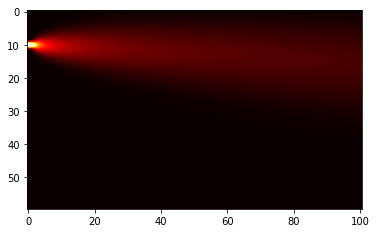

In [310]:
%matplotlib inline
import matplotlib.pyplot as plt
norm = colors.Normalize(vmin = 0, vmax = 50)

plt.imshow(np.transpose(mat_time), cmap = 'hot', interpolation = 'bicubic', norm = norm)
plt.show()

## Crank Nicolson

In [311]:
""" The Crank-Nicolson scheme"""
a_prev = (1/2) * -alpha + (1/2) * beta
a_cur = 1 - beta - (1/2) * gamma
a_next = (1/2) * alpha + (1/2) * beta
b_prev = (1/2) * alpha - (1/2) * beta
b_cur = 1 + beta + (1/2) * gamma
b_next = -(1/2) * alpha - (1/2) * beta



In [312]:
""" CHECK EUROPEAN CALL"""
import copy

N = M_high


A = np.zeros((N,N))
B = np.zeros((N,N))

for i in range(N):
    for j in range(N):
            
        if i == j:
            A[i][j] = a_cur
            B[i][j] = b_cur
            if j < N-1:
                A[i][(j + 1)] = a_next
                B[i][(j + 1)] = b_next
            if j > 0:
                A[i][(j - 1)%N] = a_prev          
                B[i][(j - 1)%N] = b_prev
        
        
# print(A)

t = 0.01

B_inv = np.linalg.inv(B)

Vn = vec_orig.copy()
maxVN = max(Vn)
for i in range(len(Vn)):
    Vn[i] = Vn[i]/maxVN*100
mat_time = [Vn]
for iteration in range(100000):
    Vn = np.dot(A, Vn)
    Vn = np.dot(B_inv, Vn)
    if iteration % 1000 == 0:
        maxVN = max(Vn)
        for i in range(len(Vn)):
            Vn[i] = Vn[i]/maxVN*100
        mat_time.append(Vn.copy())
# print(np.sum(Vn))

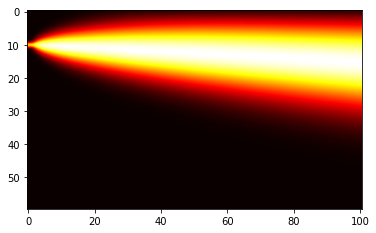

In [313]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(np.transpose(mat_time), cmap = 'hot', interpolation = 'bicubic')
plt.show()

In [314]:
sum(mat_time[-1])

2115.020486415108